!pip install mediapipe 

!pip install pyautogui

In [ ]:
import cv2
import pyautogui
from time import time
from math import hypot
import mediapipe as mp
import matplotlib.pyplot as plt

## Initialize the pose detection model

In [ ]:
mp_pose = mp.solutions.pose

#for images
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)

#for videos
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7, model_complexity=1,min_tracking_confidence=0.7)

#intialize mediapipe drawing class
mp_drawing = mp.solutions.drawing_utils

## Pose Detection

In [ ]:
mp_holistic = mp.solutions.holistic

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    cv2.imshow('Raw webcame feed', frame)

    if cv2.waitKey(10) and 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)


# Making Detections from the cam feed

In [8]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    while cap.isOpened():
        ret,frame = cap.read()
        
        # recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # make detections
        results = holistic.process(image)
        # face_landmarks , pose_landmark, left_hand_handmarks, right_hand_landmarks 
        
        #Recolor image back to bgr for rendering
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        #Draw face landmarks
#         drawing_spec = mp_drawing.DrawingSpec(circle_radius=0.0001)
        mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), #markers - white
                            mp_drawing.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=1)) #lines - connections - cyan
       
    
        cv2.imshow('Hollistic Model Detections', image)

        if cv2.waitKey(10) and 0xff == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [9]:
cap.release()

cv2.destroyAllWindows()

# Applying Styling

Trying different detection models 

In [16]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    while cap.isOpened():
        ret,frame = cap.read()
        
        # recolor image
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # make detections
        results = holistic.process(image)
        # face_landmarks , pose_landmark, left_hand_handmarks, right_hand_landmarks 
        
        #Recolor image back to bgr for rendering
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)


        #Draw face landmarks
        mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), #markers - white
                            mp_drawing.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=1)) #lines - connections - cyan
       
        # Right Hand landmarks
        mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
            
        #Left Hand landmarks
        mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        
        #Pose body
        mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        
        
        cv2.imshow('Hollistic Model Detections', image)

        if cv2.waitKey(10) and 0xff == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [17]:
cap.release()
cv2.destroyAllWindows()

# Step 1: POSE DETECTION 

In [ ]:
def detectPose(image, pose, draw=False, display=False):
    #create a copy of the input image
    output_image = image.copy()
    
    #convert the image from BGR into RGB format
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Perform the pose detection
    results = pose.process(imageRGB)
    
    
    #Check if any landmarks are detected and are specified to be drawn 
    if results.pose_landmarks and draw:
        mp_drawing.draw_landmarks(image=output_image, landmark_list = results.pose_landmarks,
                                 connections= mp_pose.POSE_CONNECTIONS,
                                 landmark_drawing_spec = mp_drawing.DrawingSpec(color=(255,255,255),
                                                                                thickness = 3,circle_radius=3)
                                 ,connection_drawing_spec = mp_drawing.DrawingSpec(color=(49,125,237),
                                                                                  thickness=2,circle_radius=2))
        
    if display:
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("original image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("output image");plt.axis('off');

    else:
        return output_image, results
        

In [ ]:
IMAGE_PATH = "jump.jpg"
image = cv2.imread(IMAGE_PATH)
detectPose(image,pose_image, draw = True, display = True) #pose_image is initialized earlier

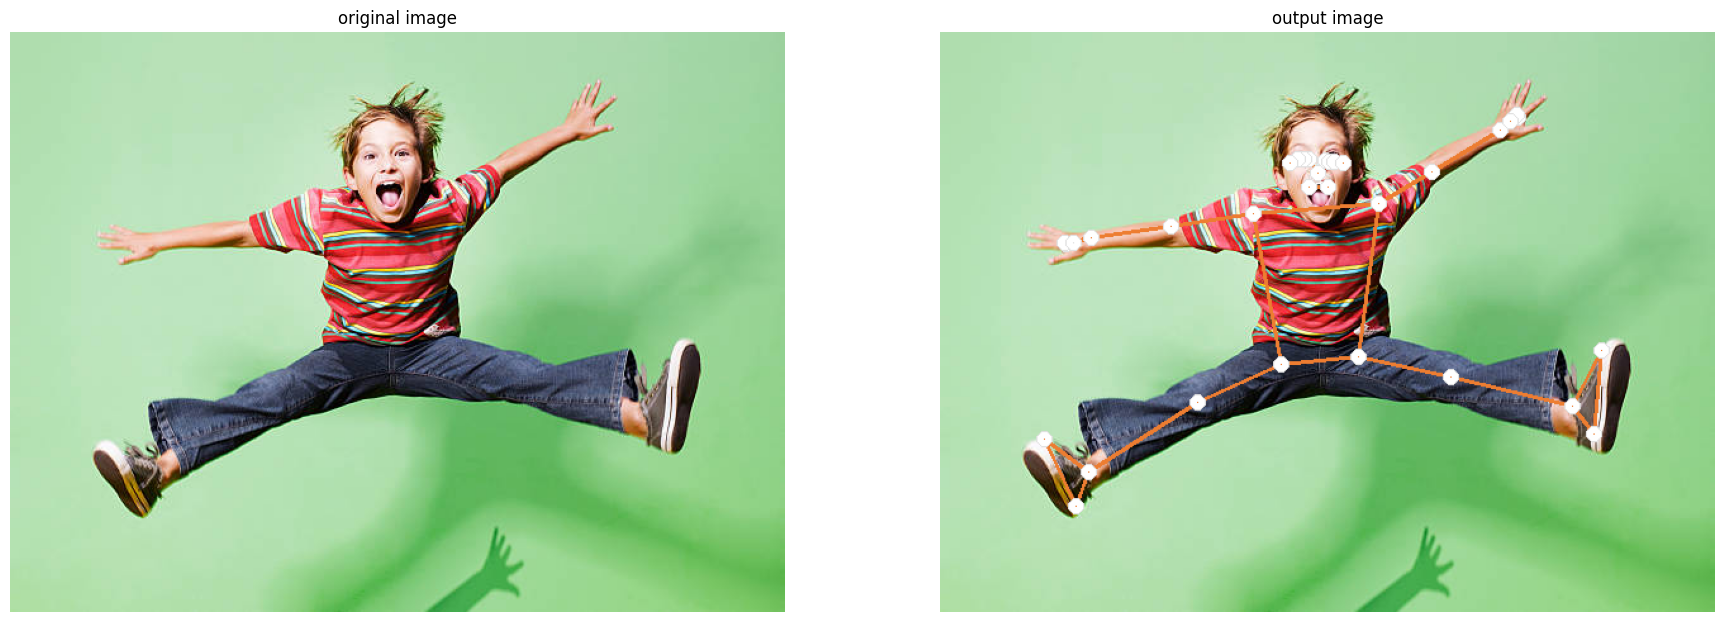

In [14]:
IMAGE_PATH = "jump2.jpg"
image = cv2.imread(IMAGE_PATH)
detectPose(image,pose_image, draw = True, display = True) 

## Control Starting Mechanism 

In [10]:
def checkHandsJoined(image, results, draw=False, display= False):
    pass

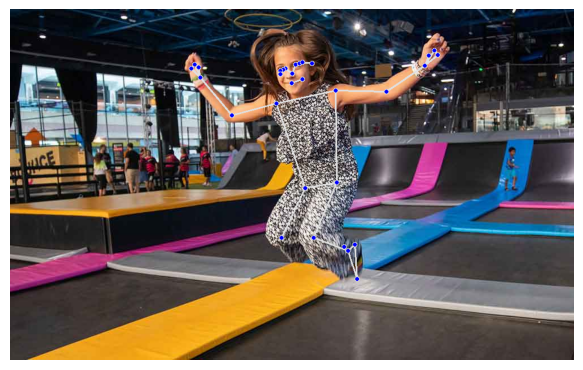

In [15]:
IMAGE_PATH = "jump.jpg"
image = cv2.imread(IMAGE_PATH)

imageRGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

posedetection = pose_image.process(imageRGB)


if posedetection.pose_landmarks:
    mp_drawing.draw_landmarks(imageRGB,posedetection.pose_landmarks,mp_pose.POSE_CONNECTIONS)

plt.figure(figsize = [16,16])
plt.subplot(121);plt.imshow(imageRGB);plt.axis('off');

## Control start mechanism 
In this step, we will set up a mechanism to start the game.
We will set a pose to start the game.In this case we chose the * Hands Joined * pose to start the game. We will measure the distance between the left and right wrist as a parameter to start the game. If the distance b/w the wrists is less than the specified threashold, then the pose is detected as joinedhands pose,and hence, started,else NO.

In [ ]:
def checkHandsJoined(image,results,draw=False, display=False):
    '''
    This function checks if the hands of the person are brought close together
    or if the person is making the hands joined pose.
    
    image : the input image of the person doing pose
    results: the output of the pose landmarks 
    '''
    
    height, width,_ = image.shape
    
    output_image = image.copy()
    
    # get the left wrist landmark x and y coordinates  
    left_wrist_landmark = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x*width,
                          results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y*height)
    
    # get the right wrist landmark x and y coordinates
    right_wrist_landmark = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x*width,
                            results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y*height)
    
    
    #Note: the x and y coordinates are normalized ( 0 to 1), hence , we multiply it with the width and height of the image
    
    # calculate the euclidean distance b/w the left and right wrist
    euclidean_distance =  int(hypot(left_wrist_landmark[0] - right_wrist_landmark[0],
                                    left_wrist_landmark[1] - right_wrist_landmark[1]))
    
    #compare teh distace b/w the wrist with threshold to check if both hands are joined together
    
    if euclidean_distance < 200 :
        
        # set the hands status to joined
        hand_status = 'Hands Joined'
        
        color = (0,255,0)
        
    else:
        hand_status = 'Hands not joined'
        color = (0,0,255)
        
    # syntax cv2.putText(img=img, text='Hello', org=(150, 250), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 255, 0),thickness=3)

    if draw :
        cv2.putText(output_image,f'Hand status :{hand_status}', (10,30),fontFace = cv2.FONT_HERSHEY_PLAIN,color = color,fontScale = 1,thickness=1)
        
        # write the calculated euclidean distance 
        cv2.putText(output_image,f'Distance : {euclidean_distance}', (10,70),fontFace = cv2.FONT_HERSHEY_PLAIN,color = color,fontScale = 1,thickness=1)
        
    
    # Check if the output image is specified to be displayed
    if display:
        plt.figure(figsize = [10,30])
        plt.imshow(output_image);plt.title("Output Image");plt.axis('off');
        
    else:
        # return the output 
        return output_image, hand_status

In [51]:
# 1. set up the webcame specifications
camera_video = cv2.VideoCapture(0)
# camera_video.set(3,1280)
# camera_video.set(4,960)

#create a named video for resizing purpose
cv2.namedWindow('Hands Joined?' ,  cv2.WINDOW_NORMAL)
# cv2.imshow('Hands Joined?', frame)

# iterate until the webcame is accessed successfully

while camera_video.isOpened(): # till the camera is open
    ok, frame = camera_video.read() # read  frame by frame
    
    if not ok:
        continue
    
    frame = cv2.flip(frame,1) # selfie-view -  flip horizontally each frame
    
    #getting the frame width and height
#     print(f'frame shape: {frame.shape}')
    frame_height,frame_width,_ = frame.shape
    
    #perform pose detection 
    frame,results = detectPose(frame,pose_video,draw=True,display=False) 
             #pose video is initialized in the begining
    
    if results.pose_landmarks:
        frame,_ = checkHandsJoined(frame,results,draw=True,display=False)
    
    #display the frame:
    cv2.imshow('Hands Joined?', frame)
    
    k = cv2.waitKey(1) & 0xff
    
    if k == 27 :
        break
        
camera_video.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [52]:
camera_video.release()
cv2.destroyAllWindows()

## Step 3: Control Horizontal Movement

In [ ]:
def checkHorizontalMovement(image, results, draw=False, display=False):
    horizontal_position = None
    
    height,width,_ = image.shape
    
    output_image = image.copy()
    
    left_x = int(result.pose_landmark[mp.pose.PoseLandmark.LEFT_SHOULDER].x * width)
    
    right_x = int(result.pose_landmark[mp.pose.PoseLandmark.RIGHT_SHOULDER].x * width)
    
    if right_x <= width//2 and left_x <= width//2:
        horizontal_position = 'left'
        
    elif right_x >= width//2 and left_x <= width//2:
        horizontal_position = 'center'
        
        
    elif right_x >= width//2 and left_x >= width//2:
        horizontal_position = 'right'
        
    if draw :
        
        cv2.putText(output_image,f'position: {horizontal_position}',(10,40),cv2.FONT_HESHEY_PLAIN)
        CV2.line(output_image,(width//2,0),(width//2,height),(255,255,0),2)
        
    if display:
        plt.figure(figsize[10,10])
        plt.imshow(output_image);plt.title("output image");plt.axis('off')
        
    else:
        return output_image . horizontal_position